In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
%config InlineBackend.figure_formats = ['svg']

# MPL
import matplotlib
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (5,5)

#colors
cmap = plt.get_cmap("viridis")
colors_b = sns.color_palette("colorblind")
colors_s = sns.color_palette("Set2")
viridis = cm.get_cmap('flare', 8)
colors = sns.color_palette("colorblind")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

/var/folders/cm/wyr4f7dd46340qyn2n3sgyzm0000gn/T/ipykernel_97732/3747977332.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('flare', 8)


### Importing Data

In [2]:
file = 'SGD_CClip_160M_SP_SL2048_3Btok_BS256'
res1 = pd.read_pickle('../data/'+file+'.pkl')
res1

,optim,clip,num_steps,bs,lr,wd,beta1,ppl_train,ppl_all,ppl_test
10,clipSGD,1,6200,256,0.0625,0,0.9875,4.978646e+01,"[14945.156746196428, 10572.657822600555, 7363....",45.894756
14,clipSGD,1,6200,256,0.0625,0,0.9750,4.739777e+01,"[24447.432320009404, 11185.689939047821, 10671...",47.248790
12,clipSGD,1,6200,256,0.0625,0,0.9000,7.491914e+01,"[57634.12928272159, 17094.457241144948, 8738.0...",79.708160
13,clipSGD,1,6200,256,0.0625,0,0.9500,5.174777e+01,"[43489.0090349043, 43990.31509617194, 43011.00...",55.022900
17,clipSGD,1,6200,256,0.1250,0,0.9750,3.940816e+01,"[44133.353227664345, 40453.95501032752, 30192....",39.368644
16,clipSGD,1,6200,256,0.1250,0,0.9500,4.176476e+01,"[56938.61096150046, 35269.62925663791, 22696.1...",43.307374
15,clipSGD,1,6200,256,0.1250,0,0.9000,5.435156e+01,"[57031.97635667063, 56268.60157939678, 44459.4...",56.047735
8,clipSGD,1,6200,256,0.1250,0,0.9875,3.907847e+01,"[21611.76823221112, 14036.288394493708, 9668.5...",40.945490
21,clipSGD,1,6200,256,0.2500,0,0.9750,3.670062e+01,"[16102.846968179454, 11173.14132948592, 6784.5...",35.629073
19,clipSGD,1,6200,256,0.2500,0,0.9500,4.020196e+01,"[22734.02814560689, 9932.916963818257, 8991.28...",39.089642


In [3]:
print(len(res1))

24


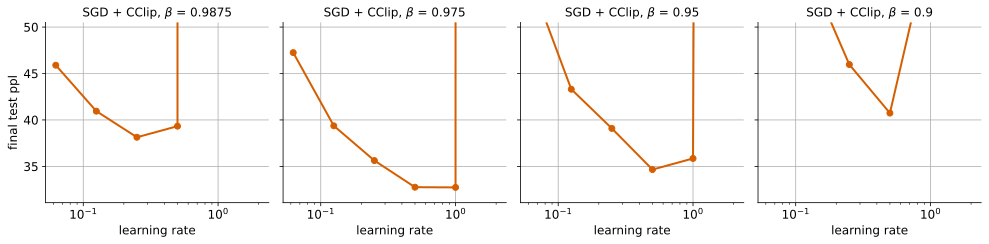

In [5]:
lrs = [0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
clipz = [1.0]
beta1s_n = np.flip(np.array([0.9, 0.95, 0.975, 0.9875]))

fig, axes = plt.subplots(1, 4, figsize=(14, 3.5), sharey=True)

for j, beta1 in enumerate(beta1s_n):
    ax = axes[j]
    lrs_plt = np.array(res1[res1['beta1']==beta1]['lr'])
    data = np.array(res1[res1['beta1']==beta1]['ppl_test'])
    ax.plot(lrs_plt, data,  marker='o', color=colors[3])
    ax.set_xscale('log')
    ax.set_ylim([31.1, 50.5])
    ax.set_title(r'SGD + CClip, $\beta$ = ' + str(beta1))
    ax.set_xlabel('learning rate')
    ax.grid(True)

# Set y-label only once (leftmost plot)
axes[0].set_ylabel('final test ppl')

plt.tight_layout()
#plt.savefig('betas_160M_SGDCClip_complete.pdf', format="pdf", bbox_inches="tight")